<a id="toc"></a>
# barc4sr: 
## Example 03 - Spectrum spatial distribution for an ideal and a tabulated undulator

[rafael.celestre@synchrotron-soleil.fr](mailto:rafael.celestre@synchrotron-soleil.fr)

<hr style="border:1px solid orange">

In [1]:
__author__ = ['Rafael Celestre']
__contact__ = 'rafael.celestre@synchrotron-soleil.fr'
__license__ = 'GPL-3.0'
__copyright__ = 'Synchrotron SOLEIL, Saint Aubin, France'
__created__ = '25/MAR/2024'
__changed__ = '18/JUN/2024'

import sys

import barc4sr.sr_undulator as und
import numpy as np
from barc4plots.barc4plots import PlotManager
from barc4sr.aux_processing import read_emitted_radiation, select_energy_range
from barc4sr.aux_utils import (
                            ElectronBeam,
                            MagneticStructure,
                            SynchrotronSource,
)


# checking we are using the correct python:
print(sys.executable)
print(sys.version)

# # benchmarking tools
%load_ext autoreload
%autoreload 2
# %matplotlib widget

c:\Users\celestre\AppData\Local\miniconda3\envs\oasys\python.exe
3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]


### Creation of SYNED input file (.json)

[Back to the top](#toc)

The SYNED Light Source file containing the electron beam parameters and the undulator parameters
is necessary for using barc4sr. While the preferred method for generating it remains [OASYS](https://oasys-kit.github.io/), 
barc4sr provides its own functions methods.



In [2]:
straight_section = ElectronBeam()

straight_section.from_twiss(energy=2.75, energy_spread=0.001025, current=0.500,
                            emittance=3.939e-9, coupling=1/100,
                            emittance_x=None, emittance_y=None,
                            beta_x=4.789, beta_y=3.7497, 
                            alpha_x=-0.3858, alpha_y=-0.7746,
                            eta_x=0.1804, eta_y=0.0044,
                            etap_x=0.0007, etap_y=-0.0025)

u64 = MagneticStructure(K_vertical=0.0,
                        K_horizontal=0.0,
                        period_length=64e-3,
                        number_of_periods=28.0)

u64.set_resonant_energy(50, 1, straight_section.energy_in_GeV, "v")

hermes = SynchrotronSource(straight_section, u64)
hermes.write_syned_config(".\light_sources\soleil_hu64.json", "SOLEIL-HU64")

## Ideal undulator

### Calculation of the **ideal 2D spectrum distribution** of an ideal planar undulator

This example show different ways or calling ```xoppy.emitted_radiation(*args, **kwargs)```: 

In [3]:
ei = 40    
ef = 60    
ne = int((ef-ei)/0.10) + 1

step = 20e-6
hor_slit=2.8e-3
hor_slit_n=int(hor_slit/step)+1
ver_slit=2.8e-3
ver_slit_n=int(ver_slit/step)+1

In [4]:
undulator_radiation = und.emitted_radiation(
                                            file_name=".\_results\SOLEIL-U64mm",
                                            json_file=".\light_sources\soleil_hu64.json",
                                            photon_energy_min=ei,
                                            photon_energy_max=ef,
                                            photon_energy_points=ne,
                                            hor_slit=hor_slit, 
                                            hor_slit_n=hor_slit_n,
                                            ver_slit=ver_slit,
                                            ver_slit_n=ver_slit_n,
                                            observation_point=20,
                                            Kv_symmetry=1,
                                            parallel=True)


Undulator radiation spatial and spectral distribution using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing flux through finite aperture (simplified partially-coherent simulation) in parallel... 
>>> ellapse time:
 Core 1: 4.17 s for 17 pts (E0 = 40.0 eV).
 Core 2: 4.09 s for 17 pts (E0 = 41.7 eV).
 Core 3: 3.76 s for 16 pts (E0 = 43.4 eV).
 Core 4: 4.00 s for 17 pts (E0 = 45.0 eV).
 Core 5: 3.32 s for 17 pts (E0 = 46.7 eV).
 Core 6: 2.52 s for 16 pts (E0 = 48.4 eV).
 Core 7: 2.92 s for 17 pts (E0 = 50.0 eV).
 Core 8: 3.10 s for 17 pts (E0 = 51.7 eV).
 Core 9: 3.73 s for 16 pts (E0 = 53.4 eV).
 Core 10: 4.13 s for 17 pts (E0 = 55.0 eV).
 Core 11: 3.87 s for 17 pts (E0 = 56.7 eV).
 Core 12: 3.84 s for 17 pts (E0 = 58.4 eV).
completed
Undulator radiation spatial and spectral distribution using SRW: finished
>> Total elapsed time: 4.95 s


In [5]:
undulator_radiation = read_emitted_radiation([".\_results\SOLEIL-U64mm_undulator_radiation.h5"])
undulator_radiation = select_energy_range(undulator_radiation, -1, -1, dx=2, dy=2)

.\_results\SOLEIL-U64mm_undulator_radiation.h5
UR files loaded
Processing undulator radiation
> 201 sample images (141 x 141) found (0.00 Gb in memory)
Puissance totale reçue : 0.124 W
Puissance crête reçue (incidence normale): 0.016 W/mm^2
Dictionary written
Processing undulator radiation (parallel)
> 201 sample images (101 x 101) found (0.00 Gb in memory)
Puissance totale reçue : 0.065 W
Puissance crête reçue (incidence normale): 0.016 W/mm^2
Dictionary written


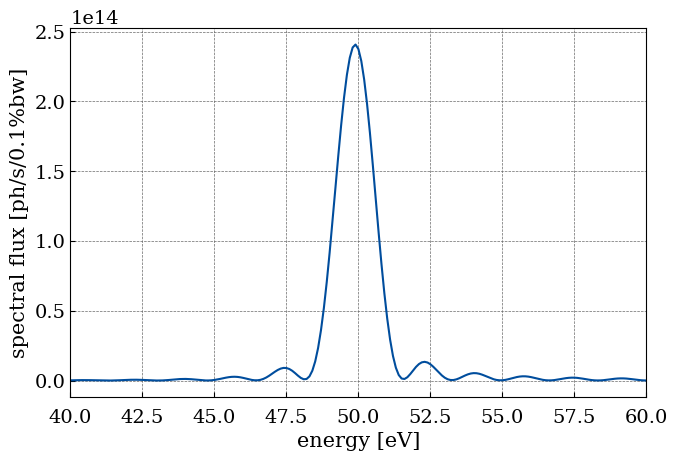

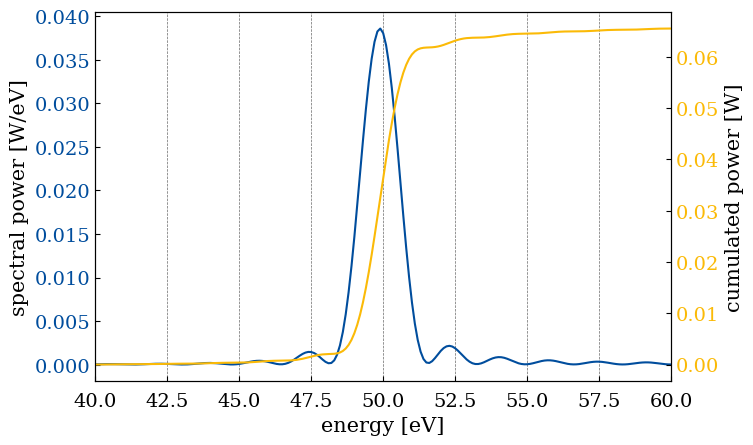

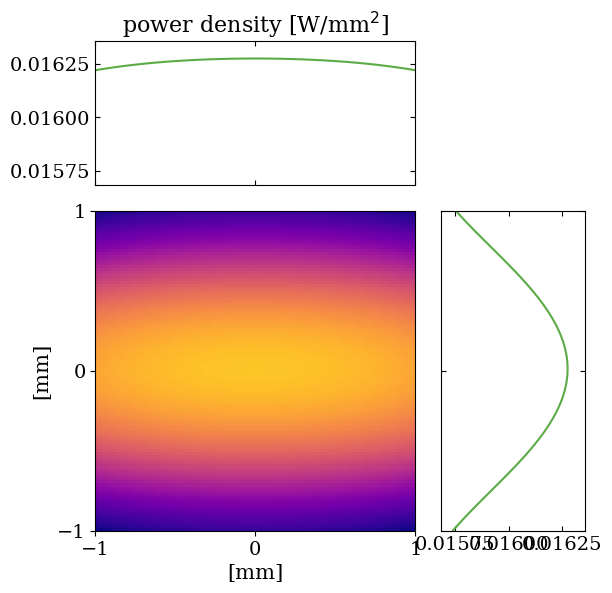

In [6]:
img = PlotManager(undulator_radiation["spectrum"]["flux"],  undulator_radiation["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")#, 30, 65000, 1e10, 3e15)
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d()

img = PlotManager(undulator_radiation["spectrum"]["spectral_power"], undulator_radiation["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral power [W/eV]")#, 30, 65000, -.005, 0.145)
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1)
img.info_1d_twin(undulator_radiation["spectrum"]["cumulated_power"], undulator_radiation["spectrum"]["energy"], "cumulated power [W]", None, None, 1, None, "-").plot_1d()

pmin = np.amin(undulator_radiation["power_density"]["map"])*1
pmax = np.amax(undulator_radiation["power_density"]["map"])*1.005
img = PlotManager(undulator_radiation["power_density"]["map"], undulator_radiation["axis"]["x"], undulator_radiation["axis"]["y"])
img.additional_info('power density [W/mm$^2$]', '[mm]', '[mm]', min=pmin, max=pmax)
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(9, True, None).plot_2d_cuts()

In [8]:
undulator_radiation  = und.emitted_radiation(
                                             file_name=".\_results\SOLEIL-U64mm_me",
                                             json_file=".\light_sources\soleil_hu64.json",
                                             photon_energy_min=ei,
                                             photon_energy_max=ef,
                                             photon_energy_points=ne,
                                             hor_slit=hor_slit, 
                                             hor_slit_n=hor_slit_n,
                                             ver_slit=ver_slit,
                                             ver_slit_n=ver_slit_n,
                                             observation_point=20,
                                             Kv_symmetry=1,
                                             number_macro_electrons=200,
                                             parallel=True)

Undulator radiation spatial and spectral distribution using SRW: please wait...
> Generating the electron beam ... completed
> Generating the magnetic structure ... completed
> Electron trajectory calculation ... completed
> Performing flux through finite aperture (accurate partially-coherent simulation) in parallel... 
>>> ellapse time:
 Core 1: 1457.86 s for 17 pts (E0 = 40.0 eV).
 Core 2: 1432.15 s for 17 pts (E0 = 41.7 eV).
 Core 3: 1272.33 s for 16 pts (E0 = 43.4 eV).
 Core 4: 1074.39 s for 17 pts (E0 = 45.0 eV).
 Core 5: 852.06 s for 17 pts (E0 = 46.7 eV).
 Core 6: 962.10 s for 16 pts (E0 = 48.4 eV).
 Core 7: 915.18 s for 17 pts (E0 = 50.0 eV).
 Core 8: 1068.59 s for 17 pts (E0 = 51.7 eV).
 Core 9: 1341.15 s for 16 pts (E0 = 53.4 eV).
 Core 10: 1477.99 s for 17 pts (E0 = 55.0 eV).
 Core 11: 1470.19 s for 17 pts (E0 = 56.7 eV).
 Core 12: 1473.34 s for 17 pts (E0 = 58.4 eV).
completed
Undulator radiation spatial and spectral distribution using SRW: finished
>> Total elapsed time: 2

.\_results\SOLEIL-U64mm_me_undulator_radiation.h5
UR files loaded
Processing undulator radiation
> 201 sample images (141 x 141) found (0.00 Gb in memory)
Puissance totale reçue : 0.127 W
Puissance crête reçue (incidence normale): 0.016 W/mm^2
Dictionary written
Processing undulator radiation (parallel)
> 201 sample images (101 x 101) found (0.00 Gb in memory)
Puissance totale reçue : 0.066 W
Puissance crête reçue (incidence normale): 0.016 W/mm^2
Dictionary written


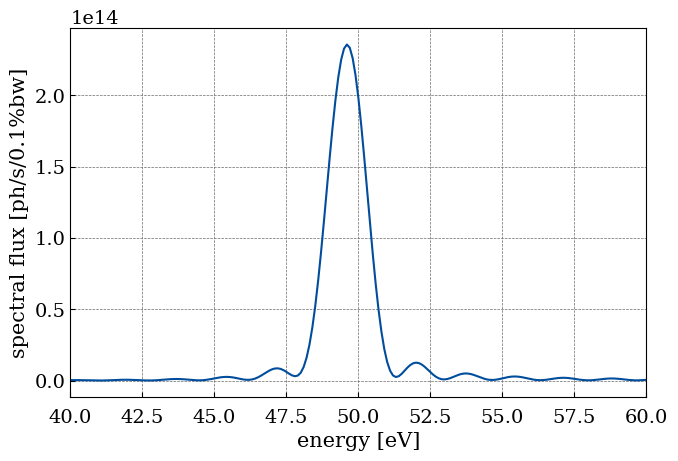

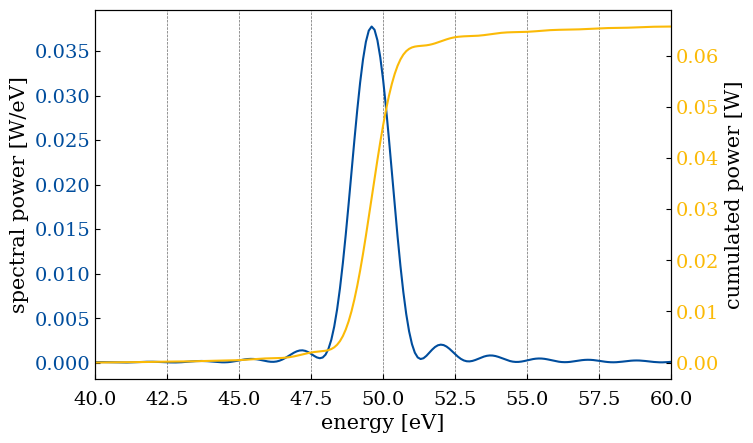

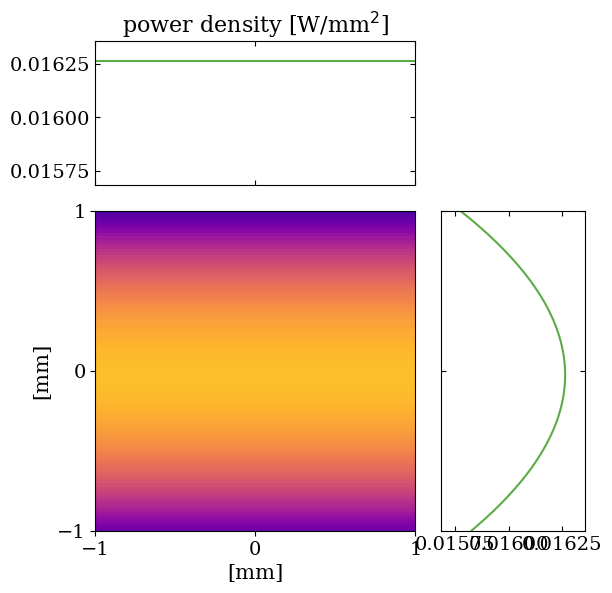

In [9]:
undulator_radiation = read_emitted_radiation([".\_results\SOLEIL-U64mm_me_undulator_radiation.h5"])
undulator_radiation = select_energy_range(undulator_radiation, -1, -1, dx=2, dy=2)

img = PlotManager(undulator_radiation["spectrum"]["flux"],  undulator_radiation["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral flux [ph/s/0.1%bw]")#, 30, 65000, 1e10, 3e15)
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1).plot_1d()

img = PlotManager(undulator_radiation["spectrum"]["spectral_power"], undulator_radiation["spectrum"]["energy"])
img.additional_info(None, "energy [eV]",  "spectral power [W/eV]")#, 30, 65000, -.005, 0.145)
img.aesthetics(400, True, True, 0 , 1, True, 4).info_1d_plot(0, None, 1, "-", False, 0, 1)
img.info_1d_twin(undulator_radiation["spectrum"]["cumulated_power"], undulator_radiation["spectrum"]["energy"], "cumulated power [W]", None, None, 1, None, "-").plot_1d()

img = PlotManager(undulator_radiation["power_density"]["map"], undulator_radiation["axis"]["x"], undulator_radiation["axis"]["y"])
img.additional_info('power density [W/mm$^2$]', '[mm]', '[mm]', min=pmin, max=pmax)
img.aesthetics(400, True, True, 0 , 1, False, 4).info_2d_plot(9, True, None).plot_2d_cuts()